<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BD%D0%B0_%D1%81%D1%85%D0%BE%D0%B4%D1%81%D1%82%D0%B2%D0%BE_%D1%81_%D0%B8%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%D0%BC_%D1%81%D0%B8%D0%B0%D0%BC%D1%81%D0%BA%D0%B8%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9%2C_Keras_%D0%B8_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;"><b>Сравнение изображений на сходство с использованием сиамских сетей, Keras и TensorFlow</b></h1>

<h1 style = "text-align: center;"> <b> Compare images for similarity using Siamese nets, Keras and TensorFlow </b> </h1>

В этом уроке вы узнаете, как сравнить два изображения на предмет сходства (независимо от того, принадлежат ли они к одному или разным классам), используя сиамские сети и библиотеки глубокого обучения Keras / TensorFlow.

In this tutorial, you will learn how to compare two images for similarity (whether they belong to the same or different classes) using Siamese networks and Keras / TensorFlow deep learning libraries.

<h3 style="text-align: center;"><b>Как сиамские сети могут предсказать сходство между парами изображений?</b></h3>

<h3 style = "text-align: center;"> <b> How can Siamese nets predict the similarity between pairs of images? </b> </h3>

 На последнем уровене в нашей реализации сиамской сети находится функция активации сигмоида.

Функция активации сигмоида имеет выходной сигнал в диапазоне [0, 1] , что означает, что когда мы представляем пару изображений нашей сиамской сети, модель будет выводить значение > = 0 и <= 1.

Два изображения полностью и совершенно не похожи, если сеть выдает значение 0, и в то время как значение 1 подразумевает, что изображения очень похожи.

At the last level in our implementation of the Siamese network is the sigmoid activation function.

The sigmoid activation function has an output in the range [0, 1], which means that when we present a pair of images of our Siamese network, the model will output the value> = 0 and <= 1.

Two images are completely and completely different if the network returns a value of 0, and while a value of 1 implies that the images are very similar.


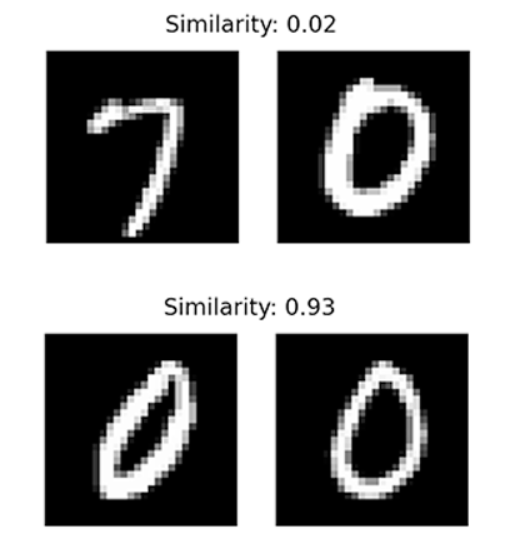

Рис. 1 - Использование сиамских сетей для сравнения двух изображений на предмет сходства приводит к получению оценки сходства. Чем ближе оценка к «1», тем больше похожи изображения (и, следовательно, с большей вероятностью они принадлежат к одному классу ). И наоборот, чем ближе оценка к «0», тем менее похожи два изображения.

Fig. 1 - Using Siamese nets to compare two images for similarity results in a similarity score. The closer the score is to "1", the more similar the images are (and therefore the more likely they are of the same class). Conversely, the closer the score is to "0", the less similar the two images are.

### Установите необходимые пакеты

### Install the necessary packages

In [2]:
!pip install tensorflow==2.3.0

### Загрузите zip-файл с кодом

### Download the code zip file

In [3]:
!wget http://dataudt.ru/datasets/cv/Lesson_3.Comparing_img_siamese.zip 
!unzip Lesson_3.Comparing_img_siamese.zip 
%cd /content/Lesson_3.Comparing_img_siamese

--2022-02-21 09:52:01--  http://dataudt.ru/datasets/cv/Lesson_3.Comparing_img_siamese.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299517 (292K) [application/zip]
Saving to: ‘Lesson_3.Comparing_img_siamese.zip’

Lesson_3.Comparing_ 100%[===================>] 292.50K   542KB/s    in 0.5s    

2022-02-21 09:52:02 (542 KB/s) - ‘Lesson_3.Comparing_img_siamese.zip’ saved [299517/299517]

Archive:  Lesson_3.Comparing_img_siamese.zip
   creating: Lesson_3.Comparing_img_siamese/examples/
 extracting: Lesson_3.Comparing_img_siamese/examples/image_01.png  
 extracting: Lesson_3.Comparing_img_siamese/examples/image_02.png  
 extracting: Lesson_3.Comparing_img_siamese/examples/image_03.png  
 extracting: Lesson_3.Comparing_img_siamese/examples/image_04.png  
 extracting: Lesson_3.Comparing_img_siamese/examples/image_05.png  
 extracting: Lesson_3.Comparing_img_si

### Импорт пакетов

### Import Packages

In [4]:
# импортируем необходимые библиотеки
# import the necessary packages
from network import config
from tensorflow.keras.models import load_model
from imutils.paths import list_images
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

### Реализация нашего скрипта подобия сиамских сетевых изображений

### Implementing our siamese network image similarity script

In [5]:
# указываем аргументы и значения
# в качестве входных изображенийй возьмем цифры из датасета MNIST
# specify arguments and values
# as input images we take numbers from the MNIST dataset
args = {
	"input": "examples"
}

In [6]:
# создадим путь к датасету с изображениями и
# случайным образом сгенерируем 10 пар изображениями
# grab the test dataset image paths and then randomly generate a
# total of 10 image pairs
print("[INFO] loading test dataset...")
testImagePaths = list(list_images(args["input"]))
np.random.seed(42)
pairs = np.random.choice(testImagePaths, size=(10, 2))

# загрузим модель с диска
# load the model from disk
print("[INFO] loading siamese model...")
model = load_model(config.MODEL_PATH)

[INFO] loading test dataset...
[INFO] loading siamese model...


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/layers/core.py:1045: UserWarning: pyimagesearch.utils is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


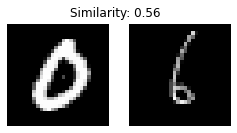

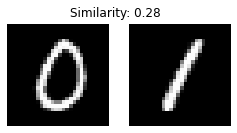

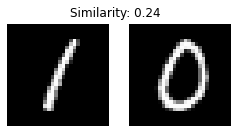

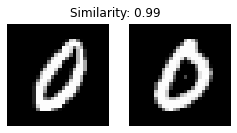

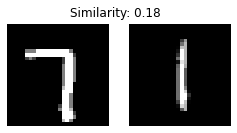

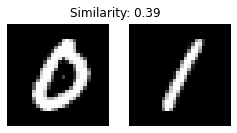

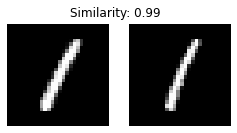

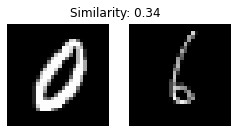

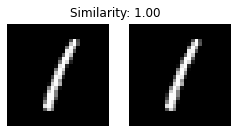

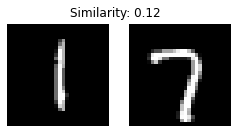

In [7]:
# пройдем циклом через все пары
# loop over all image pairs
for (i, (pathA, pathB)) in enumerate(pairs):
	# загрузим оба изображения и сконвертируем их в оттенки серого
    # load both the images and convert them to grayscale
	imageA = cv2.imread(pathA, 0)
	imageB = cv2.imread(pathB, 0)

    # создадим копии обоих изображений с целью визуализации
    # create a copy of both the images for visualization purpose
	origA = imageA.copy()
	origB = imageB.copy()

    # добавляем размерность канала обоим изображениям
    # add channel a dimension to both the images
	imageA = np.expand_dims(imageA, axis=-1)
	imageB = np.expand_dims(imageB, axis=-1)

    # добавляем размерность батча обоим каналам
    # add a batch dimension to both images
	imageA = np.expand_dims(imageA, axis=0)
	imageB = np.expand_dims(imageB, axis=0)

    # нормируем значения пикселей в диапазоне от 0 до 1
    # scale the pixel values to the range of [0, 1]
	imageA = imageA / 255.0
	imageB = imageB / 255.0

    # используем нашу сиамскую модель, чтобы сделать предсказания для пары изображений,
    # указываем, принадлежат ли изображения к одному классу
    # use our siamese model to make predictions on the image pair,
	# indicating whether or not the images belong to the same class
	preds = model.predict([imageA, imageB])
	proba = preds[0][0]

    # создаем фигуру для показа изображений
    # initialize the figure
	fig = plt.figure("Pair #{}".format(i + 1), figsize=(4, 2))
	plt.suptitle("Similarity: {:.2f}".format(proba))

    # показываем первое изображение
    # show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(origA, cmap=plt.cm.gray)
	plt.axis("off")

    # показываем второе изображение 
    # show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(origB, cmap=plt.cm.gray)
	plt.axis("off")

    # показываем весь график
    # show the plot
	plt.show()